# CME538 - Introduction to Data Science
## Lecture 8.1 - Classification I

## Setup Notebook

In [2]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pylab as plt
from ipywidgets import interact, fixed, IntSlider

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Import Lebron Data

In [3]:
lebron = pd.read_csv('lebron.csv')
lebron.head()

,game_date,minute,opponent,action_type,shot_type,shot_distance,shot_made
0,20170415,10,IND,Driving Layup Shot,2PT Field Goal,0,0
1,20170415,11,IND,Driving Layup Shot,2PT Field Goal,0,1
2,20170415,14,IND,Layup Shot,2PT Field Goal,0,1
3,20170415,15,IND,Driving Layup Shot,2PT Field Goal,0,1
4,20170415,18,IND,Alley Oop Dunk Shot,2PT Field Goal,0,1


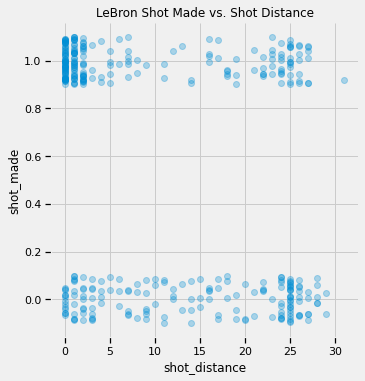

In [4]:
sns.lmplot(x='shot_distance', y='shot_made',
           data=lebron,
           fit_reg=False,
           y_jitter=0.1,
           scatter_kws={'alpha': 0.3})
plt.title('LeBron Shot Made vs. Shot Distance');

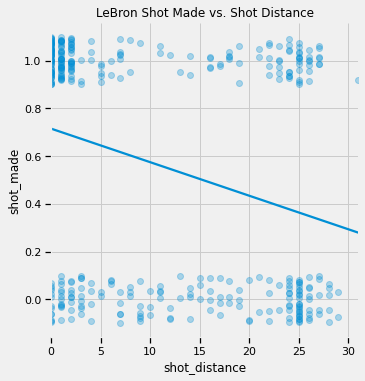

In [5]:
sns.lmplot(x='shot_distance', y='shot_made',
           data=lebron,
           ci=None,
           y_jitter=0.1,
           scatter_kws={'alpha': 0.3})
plt.title('LeBron Shot Made vs. Shot Distance');

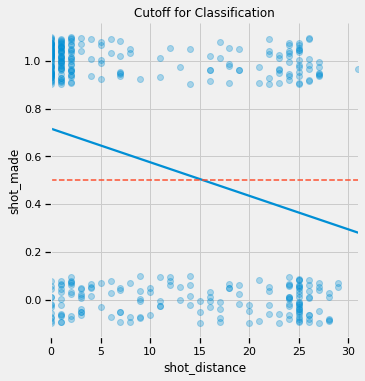

In [6]:
sns.lmplot(x='shot_distance', y='shot_made',
           data=lebron,
           ci=None,
           y_jitter=0.1,
           scatter_kws={'alpha': 0.3})
plt.axhline(y=0.5, linestyle='--', c='#fc4f30')
plt.title('Cutoff for Classification');

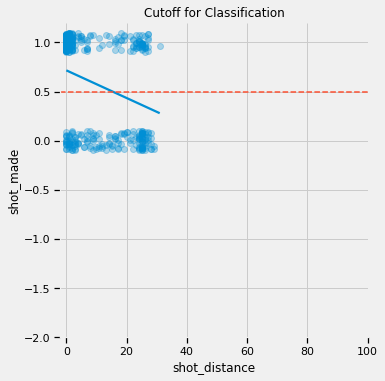

In [7]:
sns.lmplot(x='shot_distance', y='shot_made',
           data=lebron,
           ci=None,
           y_jitter=0.1,
           scatter_kws={'alpha': 0.3})
plt.axhline(y=0.5, linestyle='--', c='#fc4f30')
plt.xlim([-2, 100])
plt.ylim([-2, 1.2])
plt.title('Cutoff for Classification');

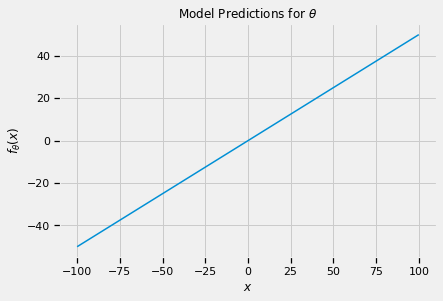

In [8]:
xs = np.linspace(-100, 100, 100)
ys = 0.5 * xs
plt.plot(xs, ys)
plt.xlabel('$x$')
plt.ylabel(r'$f_{\theta}(x)$')
plt.title(r'Model Predictions for $\theta} = 0.5 $');

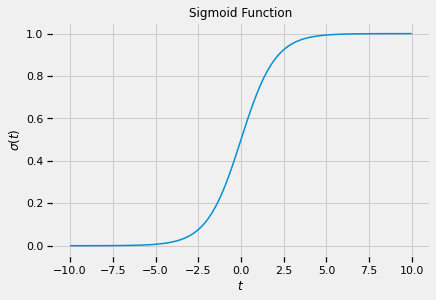

In [9]:
from scipy.special import expit
xs = np.linspace(-10, 10, 100)
ys = expit(xs)
plt.plot(xs, ys)
plt.title(r'Sigmoid Function')
plt.xlabel('$ t $')
plt.ylabel(r'$ \sigma(t) $');

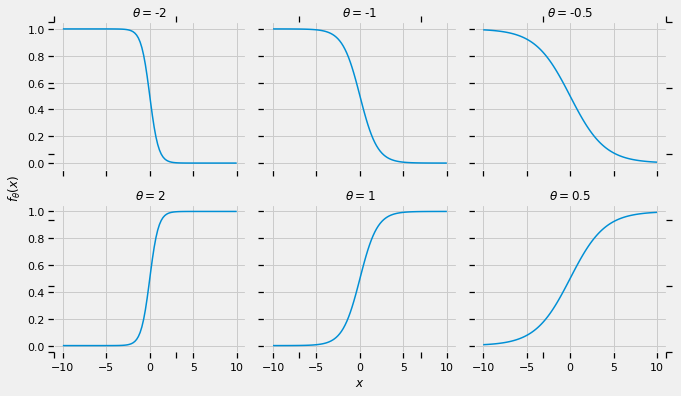

In [10]:
def flatten(li): return [item for sub in li for item in sub]

thetas = [-2, -1, -0.5, 2, 1, 0.5]
xs = np.linspace(-10, 10, 100)

fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(10, 6))
for ax, theta in zip(flatten(axes), thetas):
    ys = expit(theta * xs)
    ax.plot(xs, ys)
    ax.set_title(r'$ \theta = $' + str(theta))

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off',
                left='off', right='off')
plt.grid(False)
plt.xlabel('$x$')
plt.ylabel(r'$ f_\theta(x) $')
plt.tight_layout()

# Logistic Model

In [11]:
nba = pd.read_csv('nba.csv')
nba.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22017,1610612744,GSW,Golden State Warriors,21700002,2017-10-17,GSW vs. HOU,L,240,43,...,35,41,34,5,9,17,25,121,-1,1
1,22017,1610612745,HOU,Houston Rockets,21700002,2017-10-17,HOU @ GSW,W,240,47,...,33,43,28,9,5,13,16,122,1,1
2,22017,1610612738,BOS,Boston Celtics,21700001,2017-10-17,BOS @ CLE,L,240,36,...,37,46,24,11,4,12,24,99,-3,1
3,22017,1610612739,CLE,Cleveland Cavaliers,21700001,2017-10-17,CLE vs. BOS,W,240,38,...,41,50,19,3,4,17,25,102,3,1
4,22017,1610612750,MIN,Minnesota Timberwolves,21700011,2017-10-18,MIN @ SAS,L,240,37,...,31,42,23,7,4,13,16,99,-8,1


In [12]:
nba["WON"] = nba["WL"]
nba["WON"] = nba["WON"].replace("W", 1)
nba["WON"] = nba["WON"].replace("L", 0)
nba.head(5)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,WON
0,22017,1610612744,GSW,Golden State Warriors,21700002,2017-10-17,GSW vs. HOU,L,240,43,...,41,34,5,9,17,25,121,-1,1,0
1,22017,1610612745,HOU,Houston Rockets,21700002,2017-10-17,HOU @ GSW,W,240,47,...,43,28,9,5,13,16,122,1,1,1
2,22017,1610612738,BOS,Boston Celtics,21700001,2017-10-17,BOS @ CLE,L,240,36,...,46,24,11,4,12,24,99,-3,1,0
3,22017,1610612739,CLE,Cleveland Cavaliers,21700001,2017-10-17,CLE vs. BOS,W,240,38,...,50,19,3,4,17,25,102,3,1,1
4,22017,1610612750,MIN,Minnesota Timberwolves,21700011,2017-10-18,MIN @ SAS,L,240,37,...,42,23,7,4,13,16,99,-8,1,0


In [18]:
one_team = nba.groupby("GAME_ID").first()
opponent = nba.groupby("GAME_ID").last()
games = one_team.merge(opponent, left_index = True, right_index = True, suffixes = ["", "_OPP"])
games["FG_PCT_DIFF"] = games["FG_PCT"] - games["FG_PCT_OPP"]
games['WON'] = games['WL'].replace('L', 0).replace('W', 1)
games = games[['TEAM_NAME', 'MATCHUP', 'WON', 'FG_PCT_DIFF']]
games.head()

,TEAM_NAME,MATCHUP,WON,FG_PCT_DIFF
GAME_ID,,,,
21700001,Boston Celtics,BOS @ CLE,0,-0.049
21700002,Golden State Warriors,GSW vs. HOU,0,0.053
21700003,Charlotte Hornets,CHA @ DET,0,-0.030
21700004,Indiana Pacers,IND vs. BKN,1,0.041
21700005,Orlando Magic,ORL vs. MIA,1,0.042


#### 1. Import the `LogisticRegression` class.

In [14]:
from sklearn.linear_model import LogisticRegression

#### 2. Instantiate the `LogisticRegression` model class.

In [21]:
model = LogisticRegression(penalty='none', 
                           fit_intercept=True, 
                           solver='lbfgs')
model

LogisticRegression(penalty='none')

#### 3. Fit the model using our feature `'FG_PCT_DIFF'` and label `'WON'`.

In [63]:
model.fit(games[['FG_PCT_DIFF']], games['WON'])

LogisticRegression(penalty='none')

In [64]:
model.coef_

array([[30.5729049]])

In [65]:
model.intercept_

array([-0.01401152])

#### 4. Use the trained model to predict for new values of `'FG_PCT_DIFF'`.

In [66]:
model.predict([[0.1]])

array([1], dtype=int64)

In [67]:
model.predict_proba([[0.1]])

array([[0.04550853, 0.95449147]])

#### 5. Use the trained model to predict for multiple new values of `'FG_PCT_DIFF'`.

In [27]:
model.predict_proba(games[['FG_PCT_DIFF']])

array([[0.81936983, 0.18063017],
       [0.16709565, 0.83290435],
       [0.71731841, 0.28268159],
       ...,
       [0.37619555, 0.62380445],
       [0.94078685, 0.05921315],
       [0.9516432 , 0.0483568 ]])

In [30]:
model.predict(games[['FG_PCT_DIFF']])

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

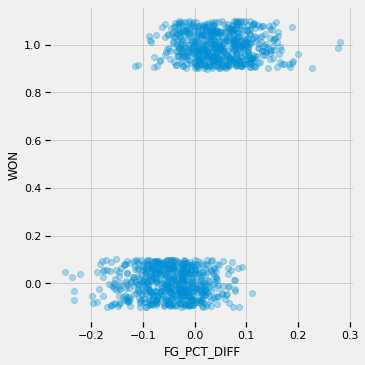

In [62]:
sns.lmplot(x='FG_PCT_DIFF', y='WON',
           data=games,
           fit_reg=False,
           y_jitter=0.1,
           scatter_kws={'alpha': 0.3});

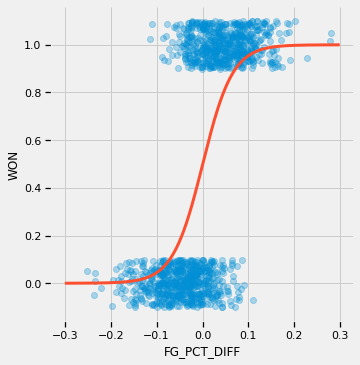

In [61]:
sns.lmplot(x='FG_PCT_DIFF', y='WON',
           data=games,
           fit_reg=False,
           y_jitter=0.1,
           scatter_kws={'alpha': 0.3})
plt.plot(np.arange(-0.3, 0.3, 0.001), 
        model.predict_proba(np.arange(-0.3, 0.3, 0.001).reshape(-1, 1))[:, 1],
        '#fc4f30', lw=3);